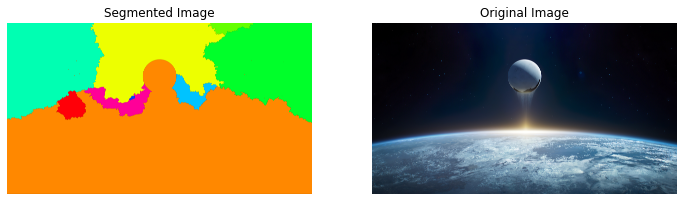

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img = cv2.imread('test.jpg')

# 转换为灰度图像
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 阈值分割
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# 去除噪声
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

# 膨胀得到背景
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# 距离变换
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# 找到未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# 标记连通区域
ret, markers = cv2.connectedComponents(sure_fg)

# 增加1以分离不同的边界，确保背景区域不是0
markers = markers+1

# 未知区域标记为0
markers[unknown==255] = 0

# 分水岭算法
markers = cv2.watershed(img, markers)
img[markers == -1] = [0,0,255]

# 根据不同的标签设置不同的颜色
label_hue = np.uint8(179*markers/np.max(markers))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# 将标志区域转换为颜色映射
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# 将未知区域标记为黑色
labeled_img[markers == -1] = 0

# 显示结果
plt.figure(figsize=[12,6])
plt.subplot(121); plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)); plt.title('Segmented Image'); plt.axis('off')
plt.subplot(122); plt.imshow(cv2.cvtColor(cv2.imread('test.jpg'), cv2.COLOR_BGR2RGB)); plt.title('Original Image'); plt.axis('off')
plt.show()